<h1 style="color:#00A6D6;">Introduction to Quantum Cryptography - Jupyter Notebooks </h1>
<h2 style="color:#00A6D6;">Chapter 5: Quantifying Information </h2>

Welcome to the new Julia sheet! As usual, we will ask you to use Julia to answer a few exercises. Most importantly, however, the purpose of these Julia sheets is for you to play around and build intuition by exploring and calculating things we do NOT ask you :-) We hope that you take advantage of using Julia this way.

* <a href="#Dist">Distinguishing quantum states</a>
* <a href="#Tra"> Trace Distance</a>
* <a href="#Min"> Min-Entropy </a>

In [2]:
include("Source/main.jl");

WebIO._IJuliaInit()

<a id=Dist></a>
<h2 style="color:#00A6D6;">Distinguishing quantum states</h2>

An important concept is to distinguish quantum states by making a measurement. Let us imagine that we are an adversary - an eavesdropper trying to extract some information from quantum states that we intercepted!

Suppose we know that in their protocol Alice and Bob will use the following coding scheme to communicate, where we assume that they already share a secret classical key $\theta \in \{0,1\}$: If Alice wants to send a bit $x \in \{0,1\}$, she encodes it into the basis $\theta$, where we will identify $\theta = 0$ with the standard and $\theta = 1$ with the Hadamard basis. That is, 
$$
x = 0 \rightarrow \left\{ \begin{array}{ll} |0\rangle & \theta = 0\\
|+\rangle & \theta = 1
\end{array}\right.
$$
and
$$
x = 1 \rightarrow \left\{ \begin{array}{ll} |1\rangle & \theta = 0\\
|-\rangle & \theta = 1
\end{array}\right.
$$

Being a resourceful eavesdropper our goal is to gain some information about $x$ even if we are completely ignorant about the basis $\theta$. That is, for us both $\theta = 0$ and $\theta = 1$ are equally likely. How can we gain the maximum amount of information?

Let us first note that since $P(\theta=0) = P(\theta = 1) = 1/2$, we want to distinguish whether we have the state 
$$
\rho_0 = \frac{1}{2} |0\rangle\langle 0| + \frac{1}{2} |+\rangle\langle +|\ .
$$
or the state 
$$
\rho_1 = \frac{1}{2} |1\rangle\langle 1| + \frac{1}{2} |-\rangle\langle -|\ .
$$
If we have no initial information about $x$ then both states are equally likely. We are thus in a situation in which we want to distinguish $\rho_0$ given with probability $p_0 = 1/2$ and $\rho_1$ given with probability $p_1 = 1/2$.

How can we distinguish them? Quantumly, this is done by means of a measurement. Since we don't care about any post-measurement states, we can just talk about performing a POVM $\{M_0,M_1\}$ where $M_0$ corresponds to a guess of '$\rho_0$' for the state, and $M_1$ for '$\rho_1$'. The probability we correctly guess the state is thus given by

$$
p_{\rm guess} = \frac{1}{2} Tr[M_0 \rho_0] + \frac{1}{2} Tr[M_1 \rho_1]\ .
$$

Indeed, we will see that the states above play a central role in BB84 QKD. 

Can you guess a good measurement? Let's first see how well we can do for some specific measurements.

In [3]:
# Define the states rho0 and rho1
# Start by defining |0> and |1>
s0 = [1;0]; 
s1 = [0;1];

# Now |+> and |->
h0 = [1;1]/sqrt(2);
h1 = [1;-1]/sqrt(2);

# Now for rho0 and rho1
rho0 = 1/2 * s0*s0' + 1/2 * h0*h0';
rho1 = 1/2 * s1*s1' + 1/2 * h1*h1';

# Let's see what they look like
print("Rho0 = ");
display(round.(rho0,digits=3));
print("Rho1 = ");
display(round.(rho1,digits=3));

Rho0 = 

2×2 Matrix{Float64}:
 0.75  0.25
 0.25  0.25

Rho1 = 

2×2 Matrix{Float64}:
  0.25  -0.25
 -0.25   0.75

In [4]:
# Let's pick a simple measurement: measuring in the standard basis!
M0 = s0*s0';
M1 = s1*s1';

pguess = 1/2 * tr(M0 * rho0) + 1/2 * tr(M1 * rho1);

# Display rounding to 3 digits
print("The success probability is ", round.(pguess,digits=3));

The success probability is 0.75

What happens to the state after the measurement? If we were to use the measurements above to attack a protocol and gain information about $x$, we will necessarily disturb the states! Write some Julia code to compute the post-measurement states for your choice of measurements.

In [4]:
# Your Julia code here

<h3 style="color:#00A6D6;"> Exercise 1</h3>
Can you do any better? Consult the book on how to find the optimal probability of success! Write Julia code to compute the success probability maximized over all possible measurements $M_0$ and $M_1$.

In [5]:
# Your Julia Code here!

<a id=Tra></a>
<h2 style="color:#00A6D6;"> Trace Distance</h2>

In the chapter we have seen that we can indeed measure how distinguishable two states are using the trace distance! The trace distances is thus a very operational way to quantify the distance between two states, i.e., how different they are. 

The trace distance is an extremely important concept also for understanding security guarantees: if the real state generated by the protocol is epsilon close in trace distance to the ideal state that we would like to obtain, then we call our protocol epsilon secure: no measurement can distinguish real from ideal with an advantage larger than epsilon.

Let us define a function to compute the trace distance. You can also find a function that does more input checking in the source folder (traceDist.jl).

In [5]:
# We can define a simple trace distance calculator:
# Input: density matrices rho1 and rho2
# Output: the trace distance between the two matrices: D(rho1,rho2)
function D(rho1,rho2)

    # Compute the difference operator and its eigenvalues
    A = rho1 - rho2;
    eigA = eigvals(A);
        
    # Remember that the optimal distinguishing measurement is given by the projectors on the positive
    # and negative eigenspaces of A. Chiefly the trace distance could be obtained from trace(MA) where M
    # is a projector on the positive eigenspace of A. To compute this, all we have to do is hence to compute
    # the sum of positive eigenvalues of A.
    s = 0;
    for j = 1:length(eigA)
            if(eigA[j] > 0)
                    s = s + eigA[j];
            end
    end

    return s;
end

D (generic function with 1 method)

Compute the trace distance between the original and the post-measurement states in your "attack" measurement distinguishing the quantum states above. Try a few (incl. the optimal) measurement. For each case, let Julia compute the success probability and the post-measurement states using the code above. 

Now use the function above to compute the trace distance between the post-measurement and the original states. What do you observe about the relation between the probability of success and the trace distance of the post-measurement to the original states for difference measurements? 

In [7]:
# Your Julia code here!

Let us visualize the trace distance between two quantum states! We have chosen two concrete ones:

\begin{align}
\rho_1&=|0\rangle\langle 0|\\
\rho_2(p)&=p|0\rangle\langle 0|+(1-p)|1\rangle\langle 1|\\
\end{align}

That is, the zero state and a mixture of zero and one. Try to experiment with other states to get a feeling of the two quantities.

Trace distance is: 0.7


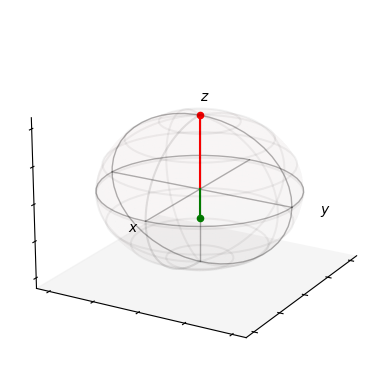

In [10]:
# Let's first define rho1 and rho2 - change these to play around!
rho1 = [1 0; 0 0]
p = 0.3 # Try changing the value of p
rho2 = p*[1 0; 0 0] + (1-p)*[0 0; 0 1]

# Compute the trace distance
dist = D(rho1,rho2) 

# Map to Bloch vectors
v1 = dens_to_bloch(rho1)
v2 = dens_to_bloch(rho2)

# Add a Bloch vector to the Bloch sphere
b1 = Bloch()
add_vector(b1,v1)
add_vector(b1,v2)
render(b1)
print("Trace distance is: ", dist, "\n")

Let us now plot how the trace distance between the states $\rho_1$ and $\rho_2(p)$ above as $\rho_2$ changes depending on $p\in[0,1]$. Make sure that you understand the extreme values. That is, the trace distance in the case that $p=0$ or $p=1$.

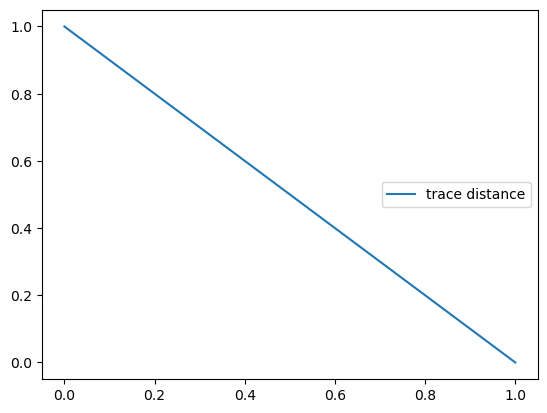

PyObject <matplotlib.legend.Legend object at 0x00000248674AAA70>

In [17]:
# Let's redefine rho1 and rho2 in separate variables in case you changed them above :-)
rho1Demo = [1 0; 0 0]

dists = [] # our data containers
fids = []

P = collect(0:0.01:1) # collect(begin:stepSize:stop) : a list of numbers

for p in P # the values of p 
    
    rho2Demo = p*[1 0; 0 0] + (1-p)*[0 0; 0 1]
    
    push!(dists,D(rho1Demo,rho2Demo)) # push the value D(rho1,rho2) into the data container
end

plot(P,dists, label = "trace distance")
legend(loc=5) # plot the legend, loc sets the location

<h3 style="color:#00A6D6;"> Exercise 2</h3>

Compute the trace distance between

* $|00\rangle\langle 00|$ and itself

* $|00\rangle\langle 00|$ and $|11\rangle \langle 11|$ 

* $|00\rangle\langle 00|$ and the EPR pair

* $|0\rangle \langle 0|$ and $|+\rangle \langle +|$

In [10]:
# You can write your code here

<a id=Min></a>
<h2 style="color:#00A6D6;"> Min-Entropy </h2>

The min-entropy is a central concept on how to quantify approximate forms of ignorance (where we are not $\epsilon$-close in terms of the trace distance to being completely ignorant :-) )! 

Let's explore the min-entropy of an eavesdropper holding an intercepted quantum system $E$ that contains information about a classical string $x = x_1,\ldots, x_n$ in system $X$. Specifically, the joint state is a cq-state
$$
\rho_{XE} = \sum_{x \in \{0,1\}^n} p_x |x\rangle\langle x|_X \otimes \rho_x^E 
$$

Let's first compute it on some simple examples of $\rho_{X} = |0\rangle\langle 0|$ ($E$ being trivial) and $\rho_{XE} = |0\rangle\langle 0|_X \otimes |0\rangle\langle 0|_E$ ($E$ has the same information).

Before you run the code, think! What do you expect? Test the code with a few other states!

In [18]:
digits = 3

# The following function computes the min-entropy for you. you may want to take a look at its code in the source folder!
# minEntropy(rhoAE, dimA) - where dimA is the dimension of the system A

# Example: Min entropy of |0><0|
rhoA = [1 0; 0 0];
e1 = minEntropy(rhoA,2);
e1 = round(e1,digits=digits);
print("Min-Entropy of |0><0| is ", e1, "\n");

# Example: Conditional min entropy of |0><0|^A x |0><0|^E
rhoAE = kron(rhoA,rhoA); 
c1 = minEntropy(rhoAE,2);
c1 = round(c1,digits=digits);
print("Min-Entropy of |0><0|^A ⊗ |0><0|^E is ", c1, "\n");

------------------------------------------------------------------
	       SCS v3.2.3 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 2, constraints m: 17
cones: 	  z: primal zero / dual free vars: 7
	  s: psd vars: 10, ssize: 1
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 6, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|2.00e+000 1.00e+000 2.53e+000 2.36e-001 1.00e-001 1.11e-004 
    50|1.68e-006 2.53e-007 1.43e-006 1.00e+000 1.00e-001 2.11e-004 
----------------------------

Let's now consider a very simple scenario where $n=1$, and $p_0 = p_1 = 1/2$, and we have the states from Exercise 1, that is,
$$
\rho_0^E = \frac{1}{2} |0\rangle\langle 0| + \frac{1}{2} |+\rangle\langle +|\ .
$$
or the state 
$$
\rho_1^E = \frac{1}{2} |1\rangle\langle 1| + \frac{1}{2} |-\rangle\langle -|\ .
$$

In [19]:
# Define the appropriate state rhoXE in Julia
rhoXE = ...

# Compute the min-entropy and print (rounded to 3 digits)
me = minEntropy(rhoXE,2);

print("The min-entropy is ",round(me,digits=3),"\n")

LoadError: UndefVarError: `rhoXE` not defined

Do you remember the operational interpretation of the min-entropy in terms of the guessing probability? Consult the book, and test the relation between $p_{\rm guess}$ and the min-entropy $H_{\rm min}(X|E)$ for the example above.

<h3 style="color:#00A6D6;"> Exercise 3</h3>
Let's now compute the conditional min entropy $H_{\rm min}(A|E)$ of A given E for some illustrative examples

* $\rho_{AE} = \frac{I_A}{2} \otimes |0\rangle\langle 0|_E$

* $\rho_{AE} = |\Phi\rangle\langle\Phi|_{AE}$ with $|\Phi\rangle_{AE} = \frac{1}{\sqrt{2}} \left(|00\rangle_{AE} + |11\rangle_{AE}\right)$

* $\rho_{AE} = \frac{1}{2} |0\rangle \langle 0|_A \otimes |0\rangle \langle 0|_E +  \frac{1}{2}|1\rangle \langle 1|_A \otimes |+ \rangle \langle +|_E$

In [ ]:
# Your Julia code goes here, where you may wish to start by adapting the code given right before.

<h3 style="color:#00A6D6;"> Exercise 4</h3>
Compute the min-entropy of the cq-state
$$
\rho_{XE} =  \sum_{x \in \{0,1\}^2} p_x |x\rangle\langle x| \otimes \rho_x
$$
with $\rho_{00}$, $\rho_{01}$, $\rho_{10}$ and $\rho_{11}$ defined below.

Remember that the function *minEntropy* takes two inputs:

* rhoAE - A bipartite system
* dimA - the dimension of the system A (which is not necessarily 2)

In [13]:
# Extend the code below, using the Julia code given above

# Probabilities
p00 = 1/4;
p01 = 1/4;
p10 = 1/10;
p11 = 4/10;

# States rho_x
v00 = [4; 1; 9; 7];
w00 = v00/sqrt(v00'*v00)[1];
rho00 = w00*w00';

v01 = [8; 1; 2; 0];
w01 = v01/sqrt(v01'*v01)[1];
rho01 = w01*w01';

v10 = [5; 9; 1; 8];
w10 = v10/sqrt(v10'*v10)[1];
rho10 = w10 * w10';

v11 = [0; 1; 2; 1];
w11 = v11/sqrt(v11'*v11)[1];
rho11 = w11 * w11';

# States |x><x|

# Construct the cq-state rhoXE

# Compute min entropy 
